In [1]:
from builtins import breakpoint
import multiprocessing as mp
import pandas.testing as pdt
from dateutil import parser
import os
import numpy as np
import pandas as pd
import threading
from tqdm import tqdm
import pdb
from sniffer import get_aggregates, analyze_data, parse_json, read_files
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import swifter
import numpy as np


In [2]:
path = '/home/ubuntu/galaxy/deployments/data/logs-540ab/' 
df = read_files(path)
print(f"No of unique rows {len(df)}")
# print(df.describe())
# print("Starting feature extraction..")
# df = analyze_data(df)
# df.to_pickle("cory_elevator.pkl")

Reading 42 Data Files


100%|████████████████████████████████████████████████████████████████████████████████████████| 42/42 [01:33<00:00,  2.24s/it]

No of unique rows 5400976


In [3]:
df = pd.read_pickle("cory_elevator.pkl")

In [4]:
print(df)

                     mac                                               time  \
0      00:0b:be:3f:8d:ab                                   [1651459734.404]   
1      00:15:f6:3a:ed:b4  [1651373116.671, 1651373119.725, 1651373132.31...   
2      00:1b:66:f2:d8:45  [1651435393.51, 1651435409.709, 1651435411.343...   
3      00:1e:e1:e5:e2:0e  [1651445313.6, 1651445313.706, 1651445314.022,...   
4      00:20:20:b0:e9:79  [1651361502.766, 1651361502.873, 1651361502.97...   
...                  ...                                                ...   
13257  ff:fb:d9:24:dc:88                   [1651375390.919, 1651375511.914]   
13258  ff:fb:ef:5d:87:84  [1651428944.195, 1651428987.956, 1651429038.48...   
13259  ff:fd:cb:65:14:76                                   [1651440277.106]   
13260  ff:fe:88:24:54:c1  [1651407447.685, 1651407447.9, 1651407448.649,...   
13261  ff:fe:8d:31:7c:8d                                   [1651466619.665]   

                                                   

In [5]:
df.describe()

,reps
count,13262.000000
mean,407.251847
std,7995.072705
min,1.000000
25%,5.000000
50%,19.000000
75%,161.750000
max,659997.000000


In [6]:
df.reps.sum()

5400974

Text(0.5, 0, 'Fig: Number of time we saw a given MAC')

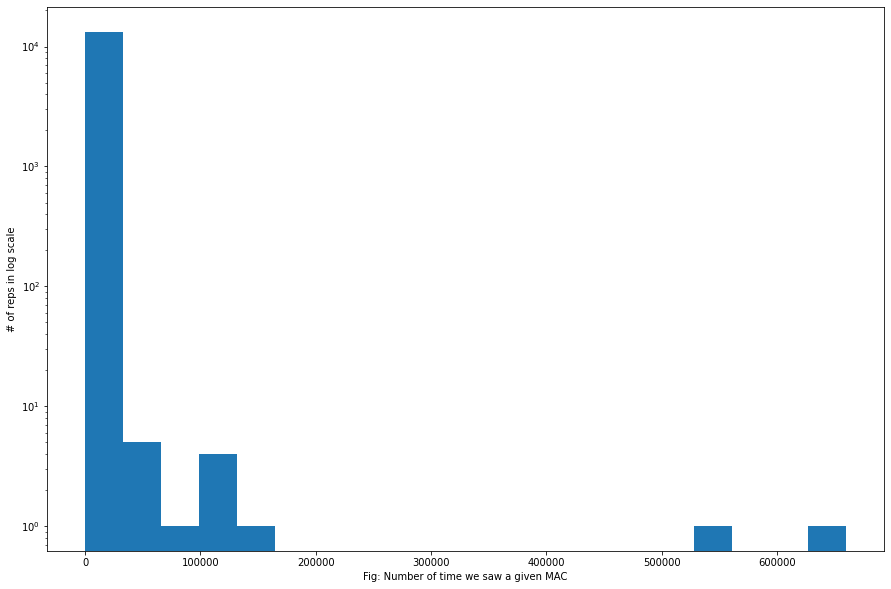

In [7]:
plt.figure(figsize=(15, 10))
plt.hist(df.reps, bins=20)
plt.yscale('log')
plt.ylabel("# of reps in log scale")
plt.xlabel("Fig: Number of time we saw a given MAC")

In [8]:
df.reps.to_numpy()

array([  1, 571,  11, ...,   1,  34,   1])

Text(0.5, 0, 'Fig: CDF of number of time we saw a given MAC')

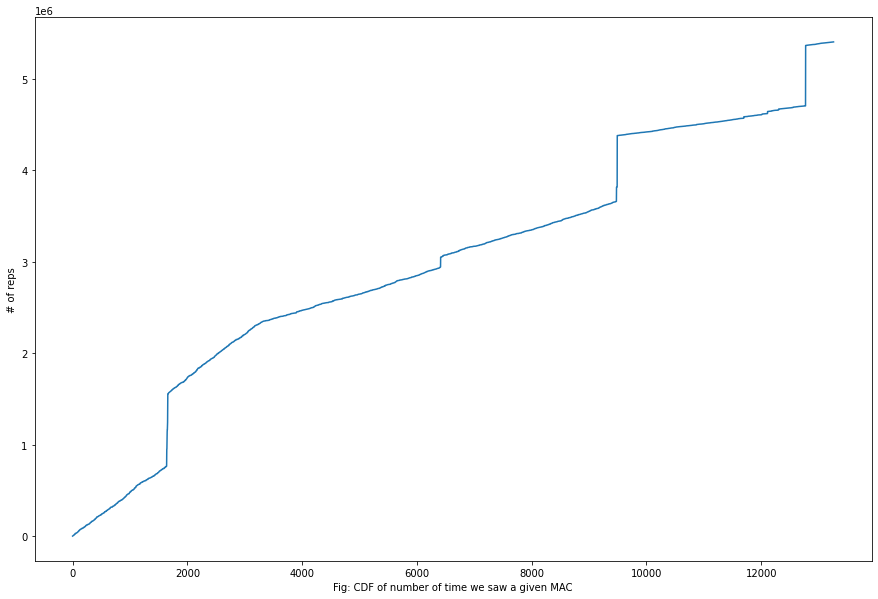

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(df.reps.to_numpy()))
plt.ylabel("# of reps")
plt.xlabel("Fig: CDF of number of time we saw a given MAC")

In [10]:
np.cumsum(df.reps.to_numpy())[-1]

5400974